## Using Keras for basic classification problems

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [20]:
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential

### We will be using a common Pima Indians Diabetes datasets

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv
    

* Number of times pregnant
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)
* 2-Hour serum insulin (mu U/ml)
* Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function
* Age (years)
* Outcome

In [4]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

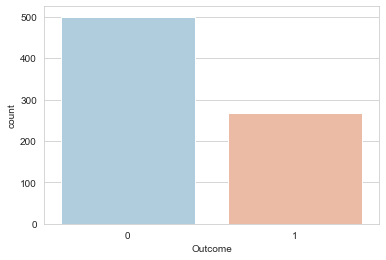

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Outcome',data=df, palette='RdBu_r')

### Split your data into in-sample and out-of-sample data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome',axis=1), 
                                                    df['Outcome'], test_size=0.20, 
                                                    random_state=101)

### Try basic Logistic model

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       103
           1       0.72      0.65      0.68        51

    accuracy                           0.80       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.80      0.80       154

0.7987012987012987


## Now try Deep Learning model

### Define your model topology

In [9]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model = Sequential()
model.add(Dense(24, input_dim=8, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compile your model

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train your model

In [29]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=500, batch_size=20)

Epoch 1/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.7915
Epoch 2/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.7866
Epoch 3/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4495 - accuracy: 0.8013
Epoch 4/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.7866
Epoch 5/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.7866
Epoch 6/500
31/31 [==============================] - 0s 2ms/step - loss: 0.5073 - accuracy: 0.7752
Epoch 7/500
31/31 [==============================] - 0s 2ms/step - loss: 0.5072 - accuracy: 0.7655
Epoch 8/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.7785
Epoch 9/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.7785
Epoch 10/500
31/31 [==============================] - 0s 2ms/step - loss: 0.5045 - accuracy: 0.7541
Epoch 11/

31/31 [==============================] - 0s 2ms/step - loss: 0.5109 - accuracy: 0.7573
Epoch 84/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.7687
Epoch 85/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4437 - accuracy: 0.8013
Epoch 86/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.8127
Epoch 87/500
31/31 [==============================] - 0s 3ms/step - loss: 0.4477 - accuracy: 0.8013
Epoch 88/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 0.7850
Epoch 89/500
31/31 [==============================] - 0s 3ms/step - loss: 0.4281 - accuracy: 0.8013
Epoch 90/500
31/31 [==============================] - 0s 3ms/step - loss: 0.4374 - accuracy: 0.8013
Epoch 91/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.7818
Epoch 92/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7769
Epoch 93/500


31/31 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8013
Epoch 246/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8176
Epoch 247/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.8192
Epoch 248/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8176
Epoch 249/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.7883
Epoch 250/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8208
Epoch 251/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.8013
Epoch 252/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8176
Epoch 253/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.7980
Epoch 254/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8094
Epoc

31/31 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8111
Epoch 408/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8062
Epoch 409/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.8160
Epoch 410/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.7899
Epoch 411/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.8160
Epoch 412/500
31/31 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.8192
Epoch 413/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.8241
Epoch 414/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3797 - accuracy: 0.8257
Epoch 415/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.8339
Epoch 416/500
31/31 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.8241
Epoc

### Evaluate your in-sample model performance

In [30]:
_, accuracy = model.evaluate(X_train, y_train)

20/20 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.7850


### Evaluate your out-of-sample model performance

In [31]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.7468
Accuracy: 74.68


In [33]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype('int32')

In [34]:
y_pred_prob[:10]

array([[0.13746428],
       [0.6040203 ],
       [0.3524022 ],
       [0.00235778],
       [0.05932623],
       [0.99967015],
       [0.27752417],
       [0.00643328],
       [0.32517427],
       [0.2291219 ]], dtype=float32)

In [37]:
y_pred[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [38]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       103
           1       0.67      0.47      0.55        51

    accuracy                           0.75       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.74      0.75      0.73       154

0.7467532467532467


### Performance is acceptable, but not great. Can we use Dropout to improve the out-of-sample performance?

In [39]:
model2 = Sequential()
model2.add(Dense(24, input_dim=8, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(12, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 24)                216       
                                                                 
 dropout_4 (Dropout)         (None, 24)                0         
                                                                 
 dense_14 (Dense)            (None, 12)                300       
                                                                 
 dense_15 (Dense)            (None, 1)                 13        
                                                                 
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________


In [46]:
# fit the keras model on the dataset
model2.fit(X_train, y_train, epochs=300, batch_size=20)

Epoch 1/300
31/31 [==============================] - 0s 3ms/step - loss: 0.4368 - accuracy: 0.7997
Epoch 2/300
31/31 [==============================] - 0s 3ms/step - loss: 0.4389 - accuracy: 0.8046
Epoch 3/300
31/31 [==============================] - 0s 3ms/step - loss: 0.4597 - accuracy: 0.7866
Epoch 4/300
31/31 [==============================] - 0s 3ms/step - loss: 0.4491 - accuracy: 0.8013
Epoch 5/300
31/31 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.8029
Epoch 6/300
31/31 [==============================] - 0s 3ms/step - loss: 0.4536 - accuracy: 0.7850
Epoch 7/300
31/31 [==============================] - 0s 2ms/step - loss: 0.4466 - accuracy: 0.7818
Epoch 8/300
31/31 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.7801
Epoch 9/300
31/31 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.7736
Epoch 10/300
31/31 [==============================] - 0s 3ms/step - loss: 0.4550 - accuracy: 0.7785
Epoch 11/

Epoch 83/300
31/31 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.7736
Epoch 84/300
31/31 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.7736
Epoch 85/300
31/31 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.7997
Epoch 86/300
31/31 [==============================] - 0s 2ms/step - loss: 0.4573 - accuracy: 0.7785
Epoch 87/300
31/31 [==============================] - 0s 2ms/step - loss: 0.4487 - accuracy: 0.7866
Epoch 88/300
31/31 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.7997
Epoch 89/300
31/31 [==============================] - 0s 2ms/step - loss: 0.4277 - accuracy: 0.8094
Epoch 90/300
31/31 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.7932
Epoch 91/300
31/31 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.7964
Epoch 92/300
31/31 [==============================] - 0s 2ms/step - loss: 0.4571 - accuracy: 0.8062


31/31 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8094
Epoch 246/300
31/31 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.8029
Epoch 247/300
31/31 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8225
Epoch 248/300
31/31 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.8078
Epoch 249/300
31/31 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.8127
Epoch 250/300
31/31 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.7980
Epoch 251/300
31/31 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.8046
Epoch 252/300
31/31 [==============================] - 0s 2ms/step - loss: 0.4531 - accuracy: 0.7801
Epoch 253/300
31/31 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.8013
Epoch 254/300
31/31 [==============================] - 0s 1ms/step - loss: 0.4363 - accuracy: 0.7948
Epoc

In [47]:
_, accuracy = model2.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.7208
Accuracy: 72.08


In [48]:
y_pred_prob = model2.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype('int32')
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       103
           1       0.62      0.39      0.48        51

    accuracy                           0.72       154
   macro avg       0.69      0.64      0.65       154
weighted avg       0.71      0.72      0.70       154

0.7207792207792207
